In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#### -->imported  libraries

In [2]:
data=pd.read_csv('creditcard.csv')

#### --> loaded data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### --> checked info of data no nans or missing values

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### -->checked head and tail of data found that columns from V1-V28 are in same scale 
#### -->amount should be scaled and time column should be dropped.

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.shape

(284807, 31)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Explore Data

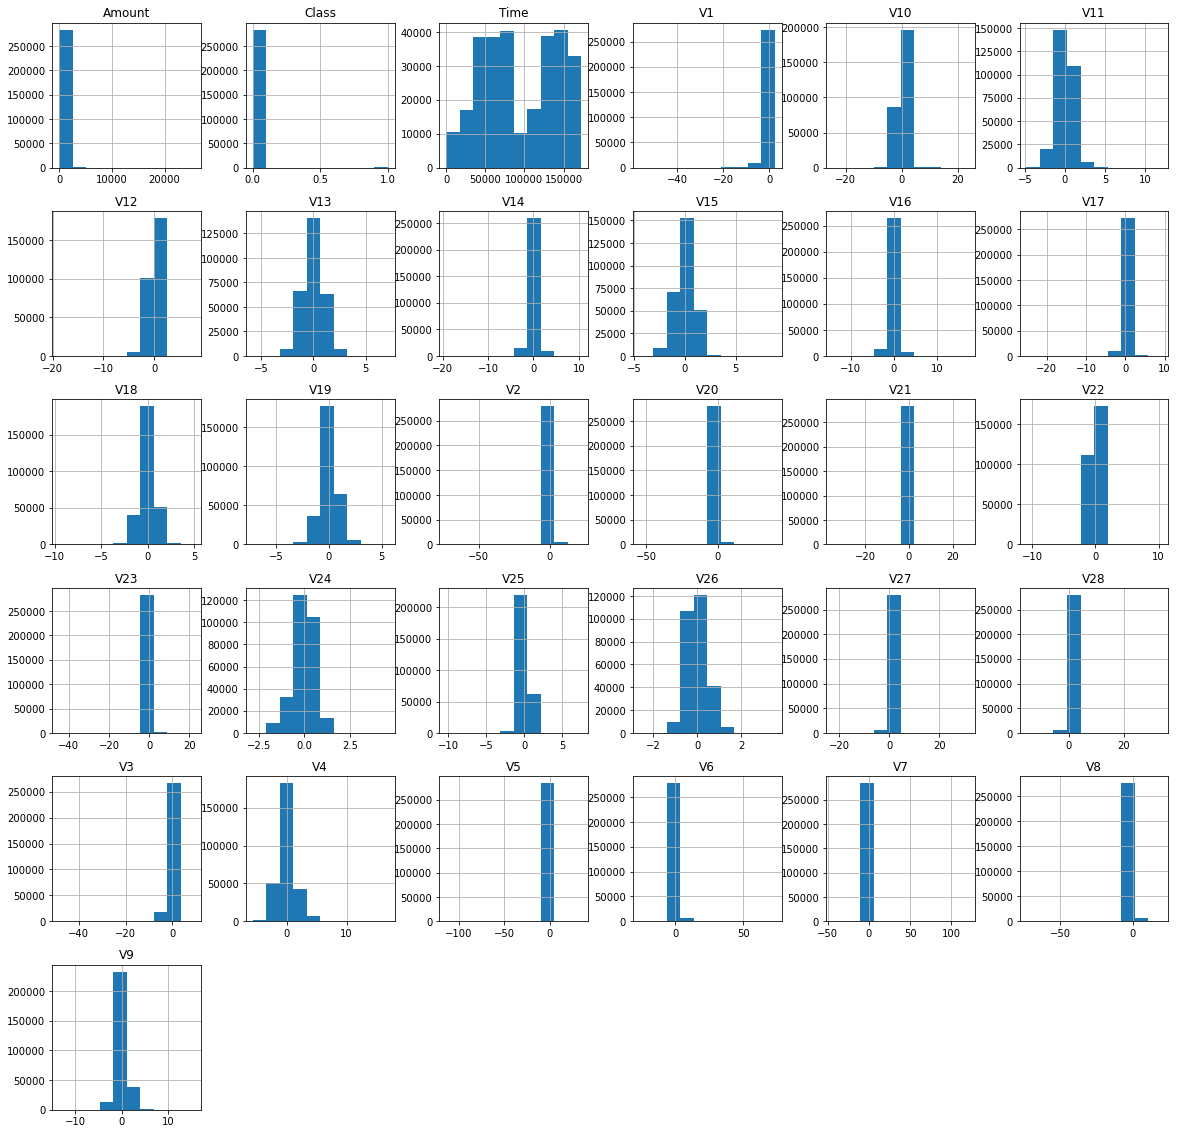

In [9]:
data.hist(figsize = (20, 20))
plt.show()

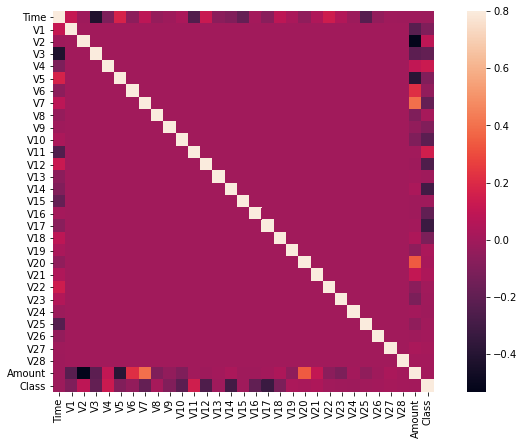

In [10]:
# Correlation matrix
fig = plt.figure(figsize = (12, 7))
sns.heatmap(data.corr(), vmax = .8, square = True)
plt.show()

## Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['scaledAmount']=sc.fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Amount','Time'],axis=1)

#### -->amount column is scaled and time column is dropped

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaledAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
data.shape 

(284807, 30)

In [14]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

#### --> splitted the Independent variable X and dependent variable y(Class)  

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### -->splitted X and y into X_train, X_test, y_train, y_test

## Using ANN 

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

model = Sequential()

#1st hidden layer
model.add(Dense(17, input_shape=(29,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

#2nd hidden layer
model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3rd hidden layer
model.add(Dense(19))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

#4th  hidden layer
model.add(Dense(25))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

model.add(Dense(1))
model.add(Activation('sigmoid'))

Using TensorFlow backend.


#### --> Done architecture of nueral network

In [17]:
# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

#### --> Done compilation of the model

In [18]:
# training the model 
model.fit(X_train, y_train,
          batch_size=10, epochs=5,
          validation_data=(X_test, y_test))

Train on 227845 samples, validate on 56962 samples
Epoch 1/5
227845/227845 [==============================] - 68s 298us/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 2/5
227845/227845 [==============================] - 64s 281us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/5
227845/227845 [==============================] - 69s 302us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 4/5
227845/227845 [==============================] - 69s 302us/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 5/5
227845/227845 [==============================] - 70s 305us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994


#### -->model trained given accuracy as above

In [81]:
#predicting Test set data
y_pred=model.predict(X_test)
y_predd=y_pred.round()
y_predd=y_predd.astype(int)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=y_predd.reshape(-1)
pred_real['y_test']=y_test

In [82]:
pred_real.head()

,y_pred,y_test
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [83]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[85154,    18],
       [16770, 68647]], dtype=int64)

## Using Decision Tree

In [58]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifierdc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierdc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
#predicting Test set data
y_pred=classifierdc.predict(X_test)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=y_pred
pred_real['y_test']=y_test


In [60]:
pred_real.head()

,y_pred,y_test
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [22]:
# Making the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[56840,    21],
       [   18,    83]], dtype=int64)

In [23]:
classifierdc.score(X_test,y_test)

0.9993153330290369

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.80      0.82      0.81       101

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## Using Random Forest

In [55]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifierrc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierrc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
#making predictions with test set
y_pred=classifierrc.predict(X_test)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=y_pred
pred_real['y_test']=y_test

In [57]:
pred_real.head()

,y_pred,y_test
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [27]:
# Making the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[56854,     7],
       [   24,    77]], dtype=int64)

In [28]:
classifierrc.score(X_test,y_test)

0.9994557775359011

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.76      0.83       101

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
data[data['Class']==1]['Class'].count()

492

#### --> identified '492' fraudulent entries in data

In [31]:
data[data['Class']==0]['Class'].count()

284315

#### ---> 284315 Non-fradulent entries found
#### ---> with this data we can say that our model can get into oversampling 

## --> Using Smote to overcome oversampling

In [32]:

!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\david\.conda\envs\p3.7\lib\site-packages (0.6.2)


In [33]:
from imblearn.over_sampling import SMOTE

#### -->imported smote

In [34]:
X_sample,y_sample=SMOTE().fit_sample(X,y.values.reshape(-1))

#### ---> It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size = 0.3, random_state = 0)

In [36]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifierrc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierrc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
#making predictions with test set
y_pred=classifierrc.predict(X_test)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=y_pred
pred_real['y_test']=y_test

In [54]:
pred_real.head()

,y_pred,y_test
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [38]:
#making confusion matrix
confusion_matrix(y_test, y_pred)

array([[85152,    20],
       [    4, 85413]], dtype=int64)

#### --> here we can see balance of both classes 

In [39]:
classifierrc.score(X_test,y_test)

0.9998593109755025

In [40]:
print(classification_report(y_test, classifierrc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

